Drought prediction(Classification)

In [ ]:
import pandas as pd
import numpy as numpy




Data loading

In [543]:
data=pd.read_csv("stage_4_drought_dataset.csv")
df=pd.DataFrame(data)
df

,row_id,RH2M,T2M_MAX,T2M_MIN,WS2M,T2M,ALLSKY_SFC_SW_DWN,PRECTOTCORR,spei,label,lat_sin,lat_cos,lon_sin,lon_cos,month_sin,month_cos
0,4001,74.508022,22.595385,15.381648,3.820110,18.487033,14.064505,0.540000,-0.509704,0,0.457874,0.889017,-0.229200,0.973379,0.5,0.866025
1,4002,80.544945,31.117473,23.957802,1.437912,27.347692,17.805495,8.071538,1.879026,0,-0.229200,0.973379,-0.900698,0.434445,0.5,0.866025
2,4000,74.840220,16.972857,15.164396,5.609231,16.079560,8.197473,1.922637,-0.714408,0,0.639439,0.768842,0.074108,0.997250,0.5,0.866025
3,4004,92.207473,23.940549,18.537253,0.783736,20.751648,13.920659,10.336813,0.578710,0,0.082808,0.996566,-0.971342,0.237686,0.5,0.866025
4,4003,22.693516,36.564725,18.226044,3.269011,27.594286,30.404176,0.259890,0.420534,0,-0.442289,0.896873,0.321439,0.946930,0.5,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115980,103994,70.577582,19.600000,15.313407,4.276044,17.417802,13.062527,1.463956,-0.375982,0,0.697790,0.716302,0.562805,0.826590,-0.5,0.866025
115981,103996,59.242637,31.815934,20.389341,1.370330,25.406484,16.758462,1.421868,-0.891197,0,0.496217,0.868199,0.975342,0.220697,-0.5,0.866025
115982,103997,66.319121,13.705055,3.350989,3.074835,8.232747,10.828022,0.817363,-0.636272,0,0.779884,0.625923,0.876727,0.480989,-0.5,0.866025
115983,103998,43.160989,32.756044,18.547582,2.631868,25.165495,20.333187,0.194615,-0.815143,0,0.511293,0.859406,0.237686,0.971342,-0.5,0.866025


Basic Data info (understand number of rows and columns,column names,Statistical summary)

In [544]:
df.shape

(115985, 16)

In [545]:
df.columns

Index(['row_id', 'RH2M', 'T2M_MAX', 'T2M_MIN', 'WS2M', 'T2M',
       'ALLSKY_SFC_SW_DWN', 'PRECTOTCORR', 'spei', 'label', 'lat_sin',
       'lat_cos', 'lon_sin', 'lon_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [546]:
df.describe()

,row_id,RH2M,T2M_MAX,T2M_MIN,WS2M,T2M,ALLSKY_SFC_SW_DWN,PRECTOTCORR,spei,label,lat_sin,lat_cos,lon_sin,lon_cos,month_sin,month_cos
count,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,1.159850e+05,1.159850e+05
mean,61995.770919,62.622005,20.748500,9.956789,2.611353,15.065260,17.618862,1.619408,-0.786354,0.517308,0.363161,0.777317,0.091252,0.644590,-1.713161e-02,-2.993147e-02
std,33487.019578,23.992455,15.096759,13.120057,1.431301,13.861579,6.385317,2.086801,1.016155,0.499702,0.464974,0.218389,0.703173,0.285886,7.129519e-01,7.003705e-01
min,4000.000000,9.337692,-39.956593,-45.271099,0.000110,-42.670659,0.000000,0.000000,-7.704723,0.000000,-0.826590,0.108867,-0.999990,0.004363,-1.000000e+00,-1.000000e+00
25%,32996.000000,43.387363,12.509780,2.924725,1.780659,7.566703,14.364835,0.212967,-1.504392,0.000000,0.021815,0.659346,-0.746057,0.418660,-8.660254e-01,-8.660254e-01
50%,61992.000000,67.142747,25.565824,12.733846,2.724725,18.799560,18.469560,0.962527,-1.029018,1.000000,0.473320,0.854912,0.271440,0.678801,-2.449294e-16,-1.836970e-16
75%,91003.000000,83.337253,31.575824,20.529231,3.405275,25.638242,21.926813,2.188791,-0.131200,1.000000,0.746057,0.949699,0.728371,0.922201,8.660254e-01,5.000000e-01
max,119999.000000,99.878022,49.593736,32.935385,11.368242,40.564505,33.741978,47.679231,3.937162,1.000000,0.994056,0.999990,0.999990,0.999990,1.000000e+00,1.000000e+00


Checking missing values in each column

In [547]:
df.isna().sum()

row_id               0
RH2M                 0
T2M_MAX              0
T2M_MIN              0
WS2M                 0
T2M                  0
ALLSKY_SFC_SW_DWN    0
PRECTOTCORR          0
spei                 0
label                0
lat_sin              0
lat_cos              0
lon_sin              0
lon_cos              0
month_sin            0
month_cos            0
dtype: int64

Datatype of each column

In [548]:
df.dtypes

row_id                 int64
RH2M                 float64
T2M_MAX              float64
T2M_MIN              float64
WS2M                 float64
T2M                  float64
ALLSKY_SFC_SW_DWN    float64
PRECTOTCORR          float64
spei                 float64
label                  int64
lat_sin              float64
lat_cos              float64
lon_sin              float64
lon_cos              float64
month_sin            float64
month_cos            float64
dtype: object

Target column is label. All other columns are features  that help the model predict the Target

0    no Drought  
1    Drought

In [549]:
df['label'].unique()

array([0, 1])

Drop row_id  ,does not carry predictive information

In [ ]:
df=df.drop('row_id',axis=1)

Visualizing the distribution of target variable


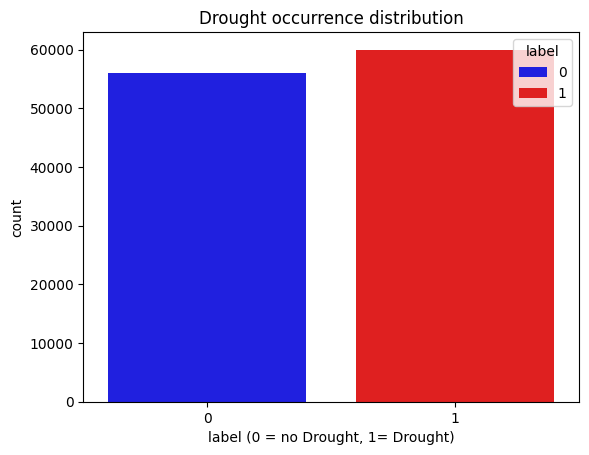

In [569]:
import seaborn 
from matplotlib import pyplot
colors=['blue','red']
seaborn.countplot(x='label',data=df,palette=colors,hue='label')
pyplot.title('Drought occurrence distribution')

pyplot.xlabel('label (0 = no Drought, 1= Drought)')
pyplot.ylabel('count')
pyplot.show()



Shows the percentage of Drought vs No Drought

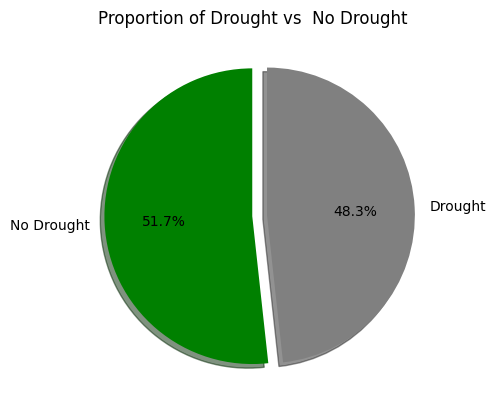

In [578]:
labels=['No Drought','Drought']
sizes=df['label'].value_counts()
colors=['green','grey']
explode=[0,0.1]
pyplot.pie(sizes,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',startangle=90,shadow=True)
pyplot.title('Proportion of Drought vs  No Drought')
pyplot.show()

Pairwise correlation between features
How features related to each other or to target
Each cell represent the correlation between two features
The diagonal is  always 1 because each feature is perfectly correlated with itself.

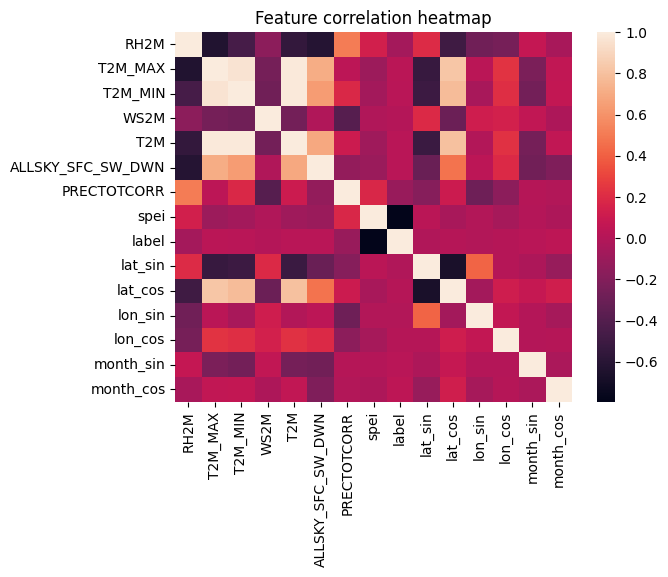

In [583]:
seaborn.heatmap(df.corr())
pyplot.title('Feature correlation heatmap')
pyplot.show()

Hisogram for main environmental features

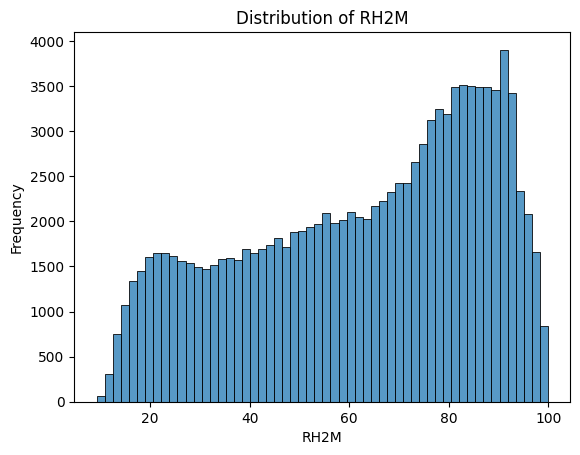

In [593]:
seaborn.histplot(data=df['RH2M'])
pyplot.xlabel("RH2M")
pyplot.title('Distribution of RH2M')
pyplot.ylabel('Frequency')
pyplot.show()

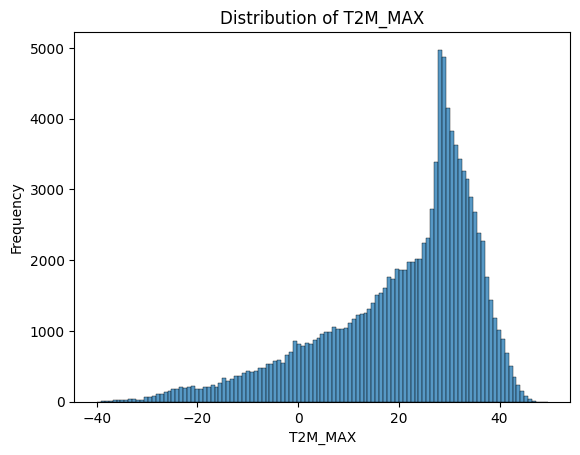

In [595]:
seaborn.histplot(data=df['T2M_MAX'])
pyplot.xlabel("T2M_MAX")
pyplot.title('Distribution of T2M_MAX')
pyplot.ylabel('Frequency')
pyplot.show()



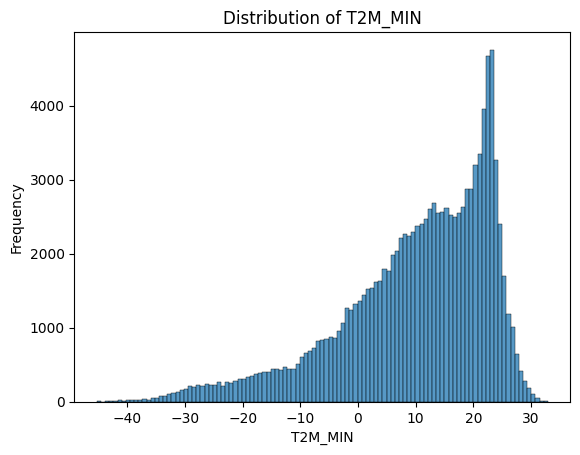

In [596]:
seaborn.histplot(data=df['T2M_MIN'])
pyplot.xlabel("T2M_MIN")
pyplot.title('Distribution of T2M_MIN')
pyplot.ylabel('Frequency')
pyplot.show()


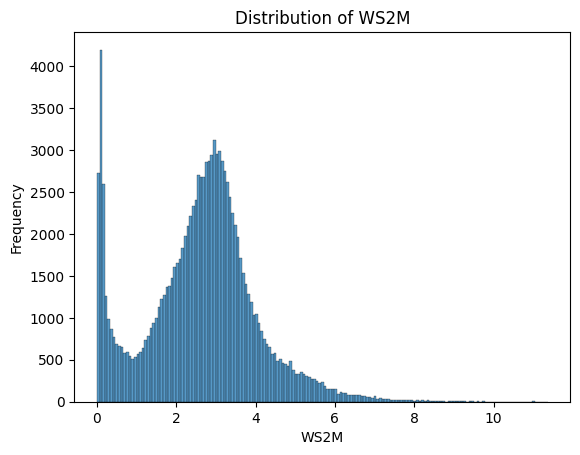

In [597]:
seaborn.histplot(data=df['WS2M'])
pyplot.xlabel("WS2M")
pyplot.title('Distribution of WS2M')
pyplot.ylabel('Frequency')
pyplot.show()

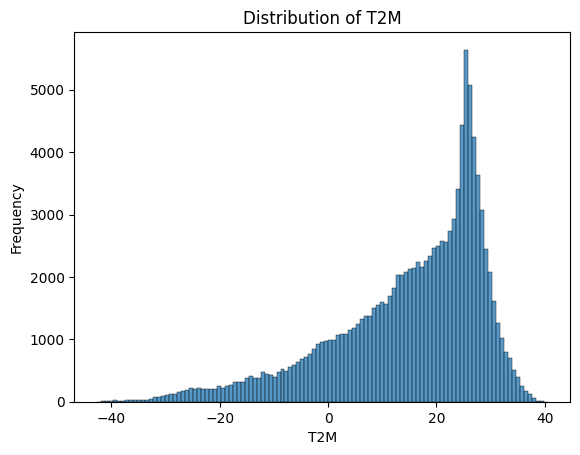

In [598]:
seaborn.histplot(data=df['T2M'])
pyplot.xlabel("T2M")
pyplot.title('Distribution of T2M')
pyplot.ylabel('Frequency')
pyplot.show()

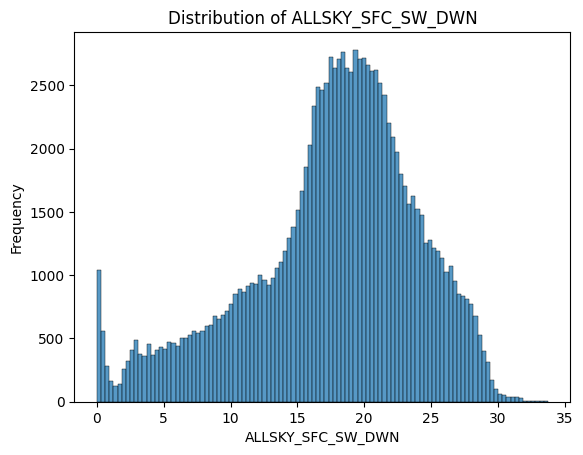

In [599]:
seaborn.histplot(data=df['ALLSKY_SFC_SW_DWN'])
pyplot.xlabel("ALLSKY_SFC_SW_DWN")
pyplot.title('Distribution of ALLSKY_SFC_SW_DWN')
pyplot.ylabel('Frequency')
pyplot.show()

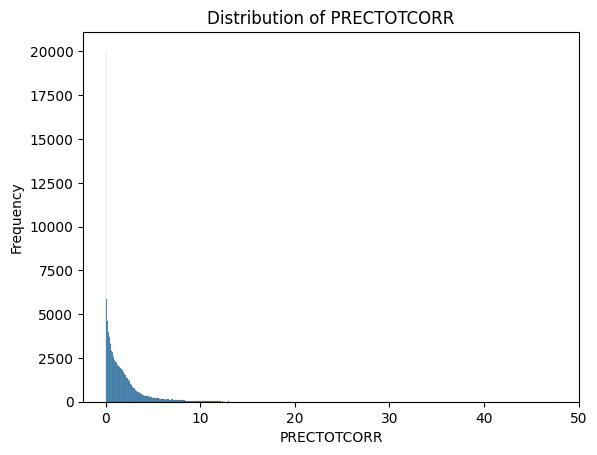

In [600]:
seaborn.histplot(data=df['PRECTOTCORR'])
pyplot.xlabel("PRECTOTCORR")
pyplot.title('Distribution of PRECTOTCORR')
pyplot.ylabel('Frequency')
pyplot.show()

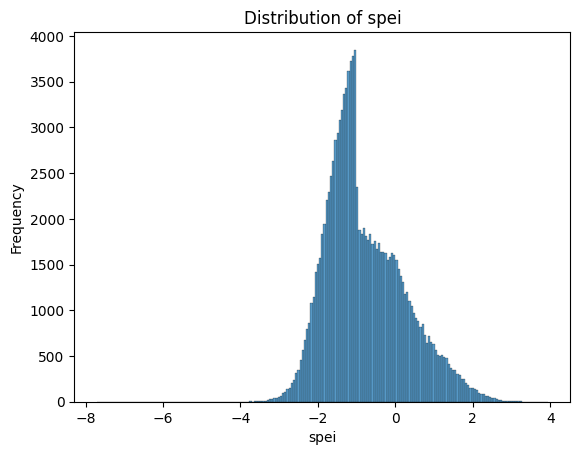

In [601]:
seaborn.histplot(data=df['spei'])
pyplot.xlabel("spei")
pyplot.title('Distribution of spei')
pyplot.ylabel('Frequency')
pyplot.show()

using  available  features to predict the label(indicating Drought condition)              
             

          
     

In [ ]:
# Separate  features and target   
X=df.drop('label',axis=1)
y=df['label']

In [553]:
X

,RH2M,T2M_MAX,T2M_MIN,WS2M,T2M,ALLSKY_SFC_SW_DWN,PRECTOTCORR,spei,lat_sin,lat_cos,lon_sin,lon_cos,month_sin,month_cos
0,74.508022,22.595385,15.381648,3.820110,18.487033,14.064505,0.540000,-0.509704,0.457874,0.889017,-0.229200,0.973379,0.5,0.866025
1,80.544945,31.117473,23.957802,1.437912,27.347692,17.805495,8.071538,1.879026,-0.229200,0.973379,-0.900698,0.434445,0.5,0.866025
2,74.840220,16.972857,15.164396,5.609231,16.079560,8.197473,1.922637,-0.714408,0.639439,0.768842,0.074108,0.997250,0.5,0.866025
3,92.207473,23.940549,18.537253,0.783736,20.751648,13.920659,10.336813,0.578710,0.082808,0.996566,-0.971342,0.237686,0.5,0.866025
4,22.693516,36.564725,18.226044,3.269011,27.594286,30.404176,0.259890,0.420534,-0.442289,0.896873,0.321439,0.946930,0.5,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115980,70.577582,19.600000,15.313407,4.276044,17.417802,13.062527,1.463956,-0.375982,0.697790,0.716302,0.562805,0.826590,-0.5,0.866025
115981,59.242637,31.815934,20.389341,1.370330,25.406484,16.758462,1.421868,-0.891197,0.496217,0.868199,0.975342,0.220697,-0.5,0.866025
115982,66.319121,13.705055,3.350989,3.074835,8.232747,10.828022,0.817363,-0.636272,0.779884,0.625923,0.876727,0.480989,-0.5,0.866025
115983,43.160989,32.756044,18.547582,2.631868,25.165495,20.333187,0.194615,-0.815143,0.511293,0.859406,0.237686,0.971342,-0.5,0.866025


In [554]:
y

0         0
1         0
2         0
3         0
4         0
         ..
115980    0
115981    0
115982    0
115983    0
115984    0
Name: label, Length: 115985, dtype: int64

Split the data into training and testing set

In [555]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

Feature Scaling

In [556]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Train Naive bayes model 

In [ ]:
from sklearn.naive_bayes import GaussianNB
nu=GaussianNB()
model=nu.fit(X_train,y_train)
# prediction on the test set
y_pred=model.predict(X_test)


In [603]:
# calculating Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9383262443959076


In [558]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[14888,  1782],
       [  364, 17762]])

In [604]:
from sklearn.metrics import precision_score,recall_score,f1_score

print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9088211215718379
0.9799183493324506
0.9430315901247677


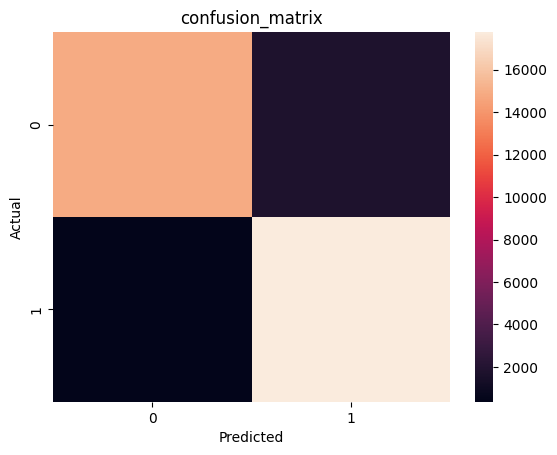

In [606]:
seaborn.heatmap(cm)
pyplot.title("confusion_matrix")
pyplot.xlabel('Predicted')
pyplot.ylabel('Actual')
pyplot.show()